# Bad 1h output & debugging

In [1]:
import sys
sys.path.insert(0, '_libs/')

In [2]:
import glob
import scipy.io
import numpy as np
import netCDF4 as nc
import NEMO_tools as Nts
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
% matplotlib inline

In [3]:
ptrc_obj = nc.Dataset('_data\EXP14_1h_20100101_20100101_ptrc_T.nc')
Ba=ptrc_obj.variables['Ba'][:]
#d18O=ptrc_obj.variables['d18O'][:]
nav_lat=ptrc_obj.variables['nav_lat'][:]
nav_lon=ptrc_obj.variables['nav_lon'][:]
deptht=ptrc_obj.variables['deptht'][:]

In [9]:
Ba.shape

(20L, 50L, 800L, 544L)

In [15]:
L = 0
lev1 = range(0, 110, 10)
lev2 = [-14, -10, -6, -2, 2, 6, 10, 14]

In [14]:
np.nanmax(Ba[19, 0, :, :])

6.0907353e+36

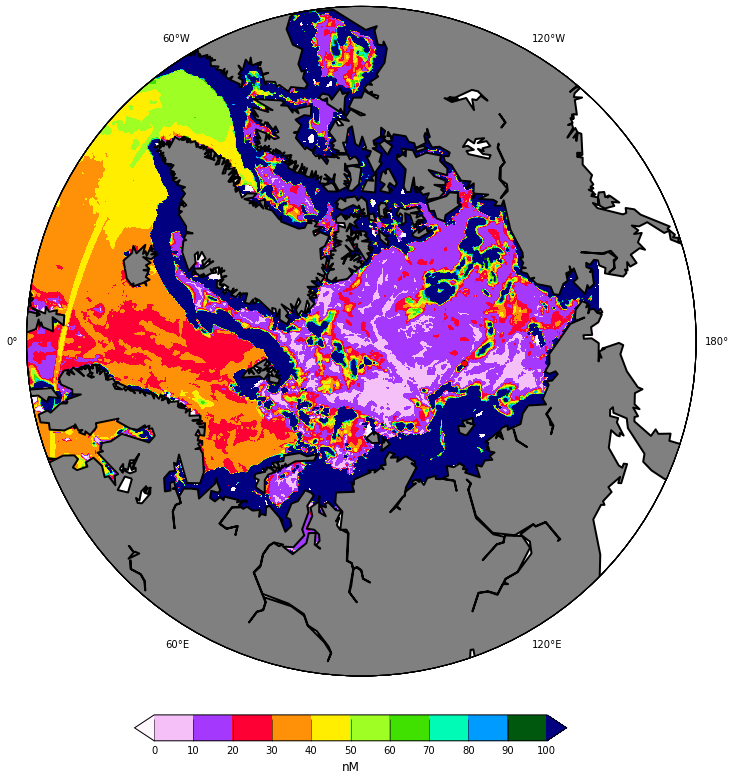

In [16]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()

proj=Basemap(projection='npstere', resolution='c', boundinglat=55, lon_0=90, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=2.0, linestyle='-', color='k')
x, y=proj(nav_lon, nav_lat)
# Ba
CS=proj.contourf(x, y, Ba[19, 0, :, :], lev1, cmap=plt.cm.gist_ncar_r, extend='both')
#proj.contour(x, y, Ba[19, 0, :, :], lev1, linewidths=1.5, colors=('gray',))

#proj.plot(x[700, 300], y[700, 300], 'ro')

cax = fig.add_axes([0.25, 0.05, 0.5, 0.03])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('nM', fontsize=12)
CBar.ax.tick_params(axis='x', length=22)
CBar.set_ticks(lev1)

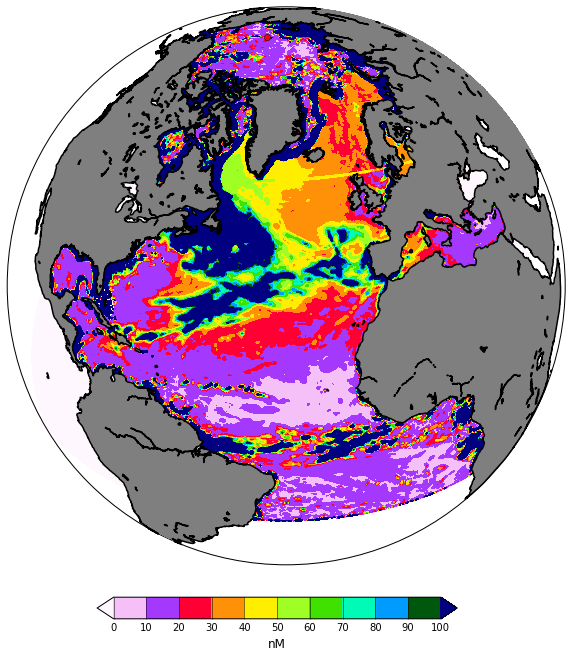

In [17]:
fig=plt.figure(figsize=(10, 10))
proj=Basemap(projection='ortho',lon_0=-32.5, lat_0=37.5, resolution='l') # http://matplotlib.org/basemap/users/omerc.html
proj.drawcoastlines(linewidth=1.5, linestyle='-', color='k', zorder=3)  
proj.drawlsmask(land_color=[0.5, 0.5, 0.5], ocean_color='None', lsmask=None, zorder=2)
x, y=proj(nav_lon, nav_lat)
# Ba
CS=proj.contourf(x, y, Ba[19, 0, :, :], lev1, cmap=plt.cm.gist_ncar_r, extend='both')
#proj.contour(x, y, Ba[19, 0, :, :], lev1, linewidths=1.5, colors=('gray',))

#proj.plot(x[700, 300], y[700, 300], 'ro')

cax = fig.add_axes([0.25, 0.05, 0.5, 0.03])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('nM', fontsize=12)
CBar.ax.tick_params(axis='x', length=22)
CBar.set_ticks(lev1)